In [18]:
import torch, torchvision

device = torch.device("cpu")

In [19]:
from torchvision.models import mobilenet_v3_large, MobileNet_V3_Large_Weights

weights = MobileNet_V3_Large_Weights.DEFAULT
model = mobilenet_v3_large(weights=weights)

model.eval().to(device)

MobileNetV3(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
      (2): Hardswish()
    )
    (1): InvertedResidual(
      (block): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=16, bias=False)
          (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
        )
        (1): Conv2dNormActivation(
          (0): Conv2d(16, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
        )
      )
    )
    (2): InvertedResidual(
      (block): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1), bi

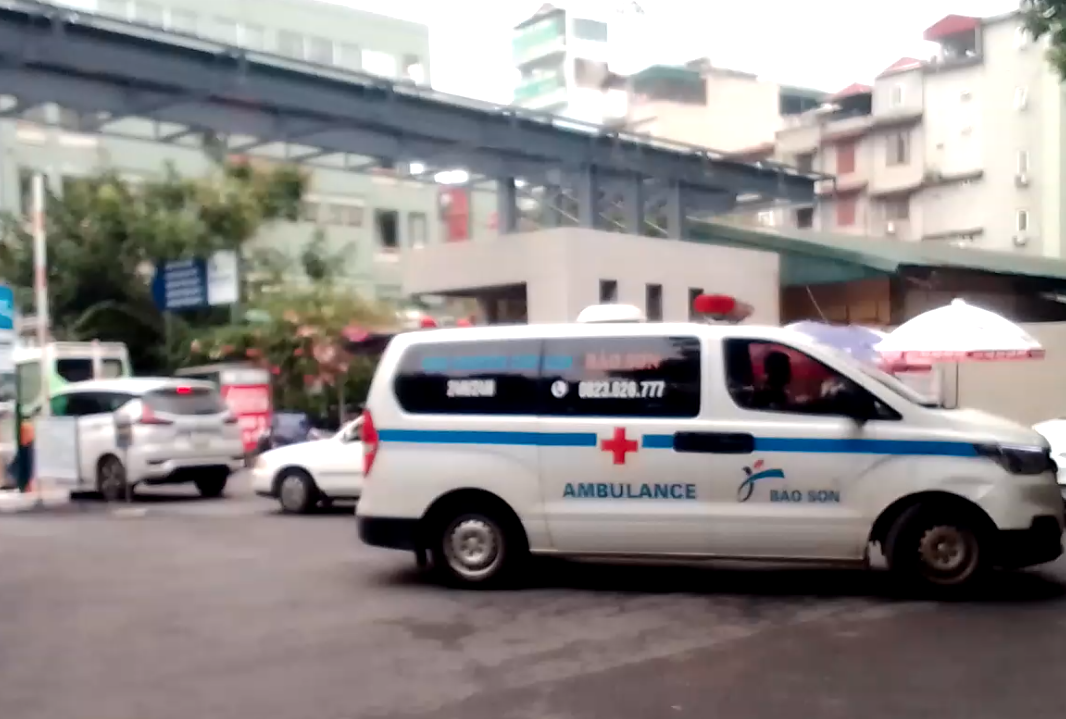

In [22]:
from PIL import Image
image = Image.open("Nov24/benh_vien_nhi.png")
image = image.convert("RGB")
image

In [23]:
transforms = weights.transforms()
input_image = transforms(image).unsqueeze(0)
input_image.dim()

4

In [24]:
prediction = model(input_image).squeeze(0).softmax(0)
prediction

tensor([1.7993e-04, 2.8072e-04, 4.2596e-04, 4.3249e-04, 2.3817e-04, 4.5214e-04,
        1.9567e-04, 2.2061e-04, 3.8113e-04, 2.4530e-04, 1.6375e-04, 9.7610e-05,
        6.0608e-04, 1.6956e-04, 2.3919e-04, 2.0201e-04, 3.9107e-04, 1.3399e-04,
        9.7069e-05, 2.4605e-04, 3.1433e-04, 2.1911e-04, 1.3913e-04, 1.2735e-04,
        1.3205e-04, 1.0545e-04, 2.2510e-04, 3.4997e-04, 3.1715e-04, 4.4458e-04,
        2.0190e-04, 1.5663e-04, 1.9158e-04, 1.9961e-04, 2.0114e-04, 2.9607e-04,
        2.3180e-04, 2.0104e-04, 2.9177e-04, 1.3982e-04, 1.1361e-04, 2.5625e-04,
        1.9308e-04, 1.4087e-04, 2.0498e-04, 1.2977e-04, 1.8989e-04, 1.4091e-04,
        1.5107e-04, 3.0973e-04, 2.0020e-04, 2.2571e-04, 1.5835e-04, 2.5660e-04,
        3.9173e-04, 1.4321e-04, 2.6422e-04, 2.0051e-04, 1.8635e-04, 1.1291e-04,
        1.2020e-04, 2.2920e-04, 1.6309e-04, 2.0647e-04, 1.8497e-04, 3.5955e-04,
        3.5527e-04, 1.7432e-04, 2.8839e-04, 1.2923e-04, 1.5978e-04, 5.0033e-04,
        2.0339e-04, 5.5389e-04, 1.5925e-

In [25]:
class_id = prediction.argmax().item()
category = weights.meta['categories'][class_id]
score = prediction[class_id].item()

print(category, score)

ambulance 0.49737367033958435
